In [1]:
%matplotlib ipympl
from impedance.preprocessing import readBioLogic
from impedance.models.circuits import CustomCircuit
import matplotlib.pyplot as plt
import numpy as np
from models import *
import mpmath as mp
import os
import csv
import pandas as pd

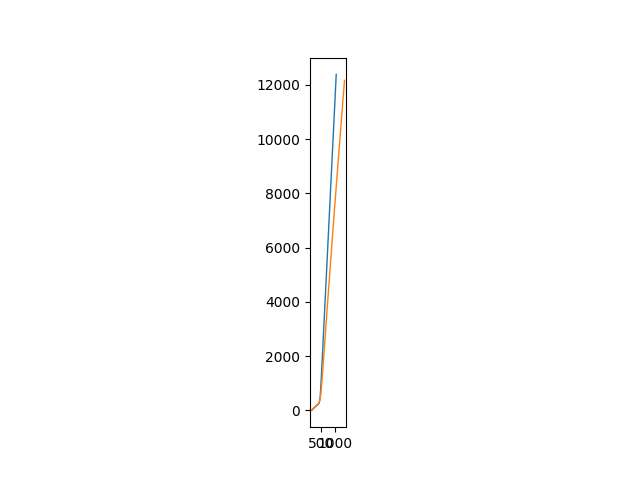

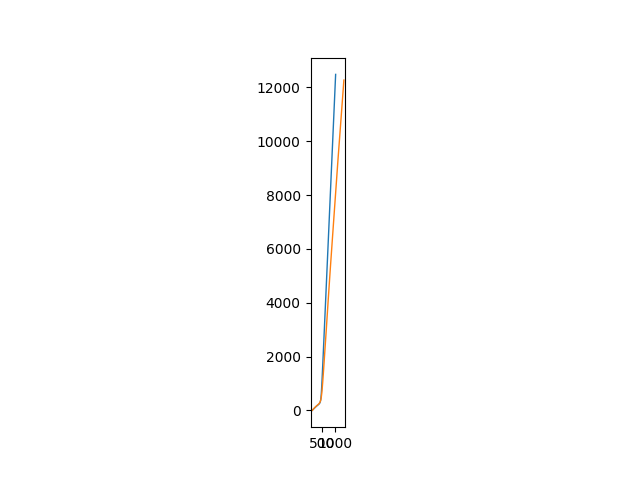

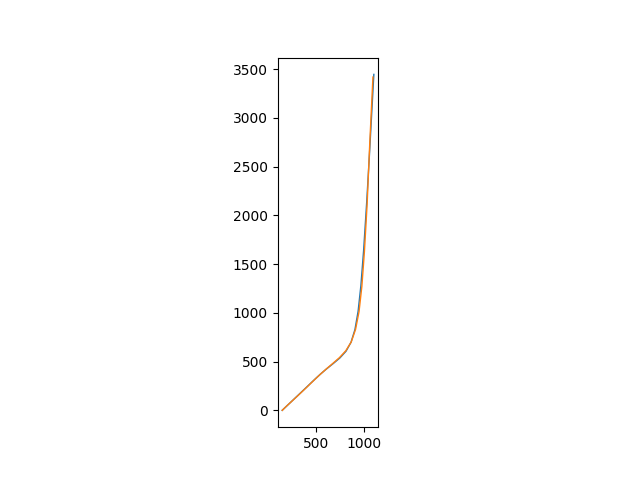

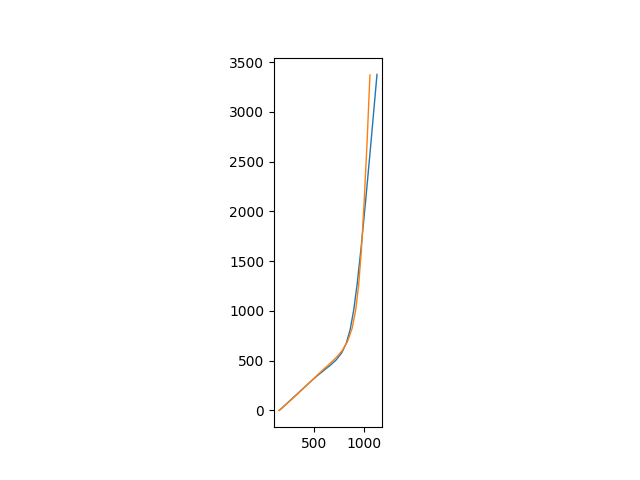

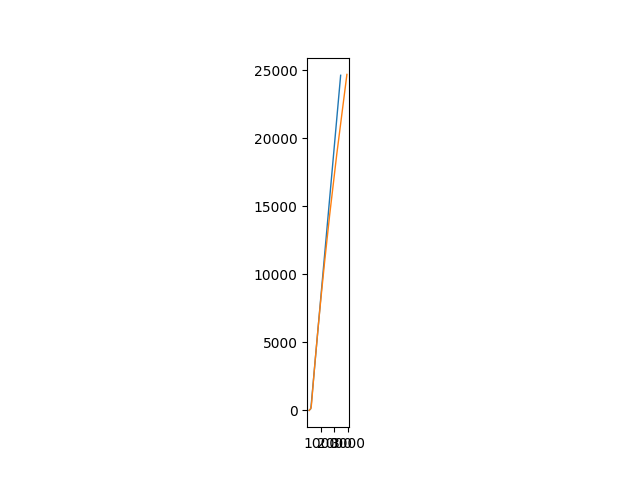

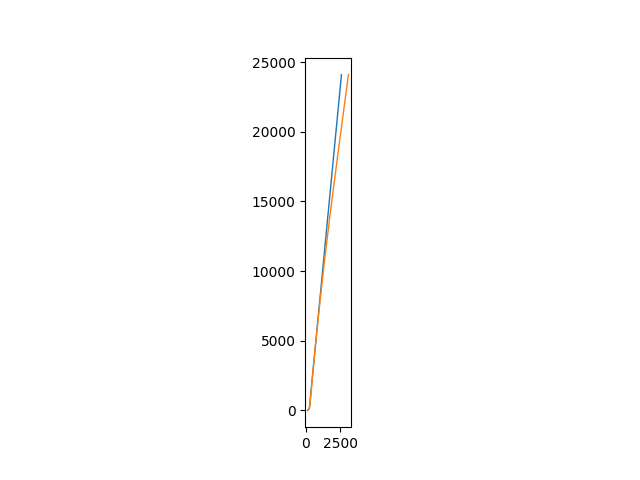

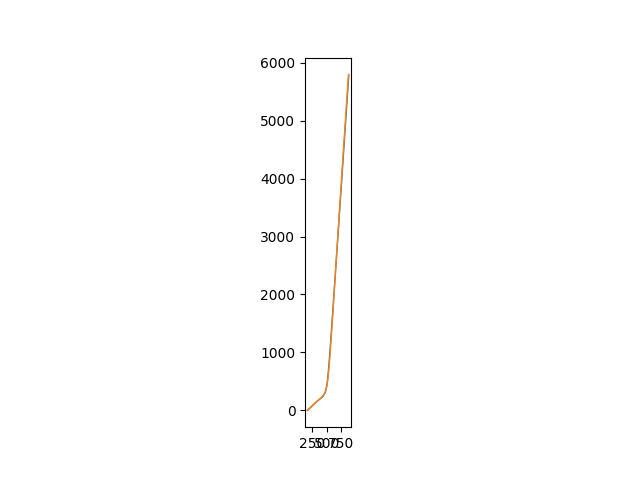

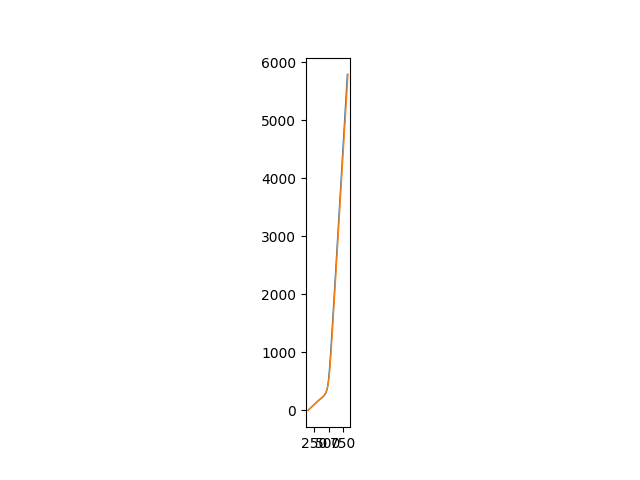

In [7]:
folder_path=os.path.join("..","exp data","EIS mpt files","single type")
first_itr=True
for file_name in os.listdir(folder_path):
    file_path=os.path.join(folder_path,file_name)
    f,z=readBioLogic(file_path)

    Rsep=100
    R1=1000
    Q=1e-4
    alpha=1
    c=CustomCircuit(initial_guess=[Rsep,R1,Q,alpha],circuit="R_1-TLMuni")

    mp.dps=300
    s_mod=np.hstack((np.abs(z),np.abs(z)))
    c.fit(impedance=z,frequencies=f,sigma=s_mod,bounds=((0,0,0,0.9),(np.inf,np.inf,np.inf,1)))
    #c.fit(impedance=z,frequencies=f,bounds=((0,0,0,0.9),(np.inf,np.inf,np.inf,1)))
    
    z_fitted=c.predict(frequencies=f)

    fcsv="../fitted parameters/single_mod_fit.csv"
    # fcsv="../fitted parameters/single.csv"
    fig, ax= plt.subplots()
    ax.plot(np.real(z_fitted),-np.imag(z_fitted),linewidth=1)
    ax.plot(np.real(z),-np.imag(z),linewidth=1)
    ax.set_aspect("equal")
    fig.savefig(f"../fitted plots/single/{file_name[:-4]}",dpi=700)

    if first_itr:
        data=[
            ["filename","Rsep","R1","Q","α"], 
            [f"{file_name}",c.parameters_[0],c.parameters_[1],c.parameters_[2],c.parameters_[3]]
        ]
        first_itr=False
        with open(fcsv,"w",newline="",encoding='UTF-8') as csv_file:
            writer=csv.writer(csv_file)
            writer.writerows(data)
    else:
        data=[
            [f"{file_name}",c.parameters_[0],c.parameters_[1],c.parameters_[2],c.parameters_[3]]
        ]
        with open(fcsv,"a",newline="",encoding='UTF-8') as csv_file:
            writer=csv.writer(csv_file)
            writer.writerows(data)

In [8]:
single_fit_data=pd.read_csv("../fitted parameters/single.csv")
single_fit_data

,filename,Rsep,R1,Q,α
0,RM_stacked second run D12_1_C03.mpt,132.288457,461.695981,0.002292,0.953039
1,RM_stacked second run D12_2_C04.mpt,131.020064,489.297606,0.002295,0.956363
2,RM_stacked second run D3_1_C07.mpt,155.566787,1162.386509,0.010570,0.969030
3,RM_stacked second run D3_2_C08.mpt,152.354104,1114.775800,0.010598,0.965594
4,RM_stacked second run S12_1_C05.mpt,140.989755,163.910139,0.001076,0.936051
5,RM_stacked second run S12_2_C06.mpt,131.232342,157.813366,0.001083,0.930057
6,RM_stacked second run S3_1_C03.mpt,160.575738,498.554528,0.004888,0.958545
7,RM_stacked second run S3_2_C04.mpt,145.907303,510.623304,0.004939,0.961726


In [9]:
df_bks=pd.read_excel(os.path.join("..","exp data","cell setup info","Cell table stacked electrodes_BKSComments.xlsx"))
df_bks=df_bks.dropna(subset=["Name ","Datum"])
df_bks=df_bks.loc[df_bks["Datum"]!=float(19082018.0)]
# df_bks=df_bks.loc[df_bks["Name "]!="RM_stacked cells second DS_3+12_1"]
df_bks

,Name,Datum,Project,m_electrode [mg],m_cc [mg],M_coating [mg],Porosity,Elyte conduct. [mS/cm],Diameter [cm],electr. thickn. [µm],cc thickness [µm],coating thickness [µm],2* Rion [Ohm] (aus EC-Lab),tau,McMullin,Comment,Masse Ref coating,Abtrag [%]
24,RM_stacked cells second S3_1,20180903.0,Stacking electrodes,26.480,0.0,NaN,0.53,0.353,1.095,268.0,0.0,NaN,986.0,NaN,NaN,NaN,NaN,NaN
26,RM_stacked cells second S3_2,20180903.0,Stacking electrodes,27.060,0.0,NaN,0.52,0.353,1.095,269.0,0.0,NaN,1014.0,NaN,NaN,NaN,NaN,NaN
28,RM_stacked cells second S12_1,20180903.0,Stacking electrodes,6.410,0.0,NaN,0.41,0.353,1.095,52.0,0.0,NaN,417.0,NaN,NaN,NaN,NaN,NaN
30,RM_stacked cells second S12_2,20180903.0,Stacking electrodes,6.495,0.0,NaN,0.43,0.353,1.095,54.0,0.0,NaN,402.0,NaN,NaN,NaN,NaN,NaN
32,RM_stacked cells second D3_1,20180903.0,Stacking electrodes,NaN,0.0,NaN,0.52,0.353,1.095,580.0,0.0,NaN,2217.0,NaN,NaN,NaN,NaN,NaN
34,RM_stacked cells second D3_2,20180903.0,Stacking electrodes,NaN,0.0,NaN,0.52,0.353,1.095,593.5,0.0,NaN,2133.0,NaN,NaN,NaN,NaN,NaN
36,RM_stacked cells second D12_1,20180903.0,Stacking electrodes,NaN,0.0,NaN,0.41,0.353,1.095,106.0,0.0,NaN,912.0,NaN,NaN,NaN,NaN,NaN
38,RM_stacked cells second D12_2,20180903.0,Stacking electrodes,NaN,0.0,NaN,0.43,0.353,1.095,112.0,0.0,NaN,972.0,NaN,NaN,NaN,NaN,NaN
40,RM_stacked cells second DS_3+12_1,20180903.0,Stacking electrodes,NaN,0.0,NaN,NaN,0.353,1.095,329.0,0.0,NaN,1968.0,NaN,NaN,NaN,NaN,NaN
42,RM_stacked cells second DS_3+12_2,20180903.0,Stacking electrodes,NaN,0.0,NaN,NaN,0.353,1.095,334.0,0.0,NaN,1923.0,NaN,NaN,NaN,NaN,NaN


In [10]:
single_fit_data["filename"]
# for fname in single_fit_data["filename"]:
    # for ffname in df_bks["Name "]:


0    RM_stacked second run D12_1_C03.mpt
1    RM_stacked second run D12_2_C04.mpt
2     RM_stacked second run D3_1_C07.mpt
3     RM_stacked second run D3_2_C08.mpt
4    RM_stacked second run S12_1_C05.mpt
5    RM_stacked second run S12_2_C06.mpt
6     RM_stacked second run S3_1_C03.mpt
7     RM_stacked second run S3_2_C04.mpt
Name: filename, dtype: object